# Census-Income Project

Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight) The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("All libraries are loaded succesfully")

All libraries are loaded succesfully


In [2]:
df = pd.read_csv("censusincome.csv")
print("Census-Income data loaded succesfully")

Census-Income data loaded succesfully


In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.sample(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
22779,26,Private,116991,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
694,25,?,202480,Assoc-acdm,12,Never-married,?,Other-relative,White,Male,0,0,45,United-States,<=50K
20640,49,Self-emp-inc,38819,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K


In [6]:
df.shape

(32560, 15)

As, we can see that in this datasets 32560 rows and 15 columns are present.

# Label in Datasets-

In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Here, target variable is "Income" and rest all are feature variables.

# Exploratory data analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


So, there is no null values are present in the dataset.And, also in this dataset there is two type data types- int & object.
Target variable is categorical(object).

In [9]:
print("Column wise data-types")
df.dtypes

Column wise data-types


Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [10]:
#checking null values -
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

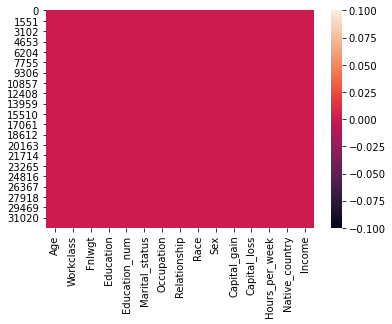

In [11]:
#check null values using heatmap-
sns.heatmap(df.isnull())

As from the above, we can clearly see that there is no null values presnt anywhere in the datasets.

In [12]:
print("Value Count of each column in the dataset-")
for i in df.columns:
    print(df[i].value_counts)
    print("\n")

Value Count of each column in the dataset-
<bound method IndexOpsMixin.value_counts of 0        50
1        38
2        53
3        28
4        37
         ..
32555    27
32556    40
32557    58
32558    22
32559    52
Name: Age, Length: 32560, dtype: int64>


<bound method IndexOpsMixin.value_counts of 0         Self-emp-not-inc
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
32555              Private
32556              Private
32557              Private
32558              Private
32559         Self-emp-inc
Name: Workclass, Length: 32560, dtype: object>


<bound method IndexOpsMixin.value_counts of 0         83311
1        215646
2        234721
3        338409
4        284582
          ...  
32555    257302
32556    154374
32557    151910
32558    201490
32559    287927
Name: Fnlwgt, Length: 32560, dtype: int64>


<bound method IndexOpsMixin.value_counts of 0          Bachelors
1            HS-gra

In [13]:
print("Unique values of each columns with counts-")
for i in df.columns:
    if df[i].dtypes == object:
        print(i,'=')
        print(df[i].value_counts())
        print('\n')

Unique values of each columns with counts-
Workclass =
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Education =
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


Marital_status =
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_sta

As we can notice that there is a special character '?' in these columns - 'Workclass','Occupation' and 'Native_country'.

In [14]:
col_ = ['Workclass','Occupation','Native_country']
for i in col_:
    df[i]=df[i].fillna(df[i].mode()[0])

In [15]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# Data Visualization-

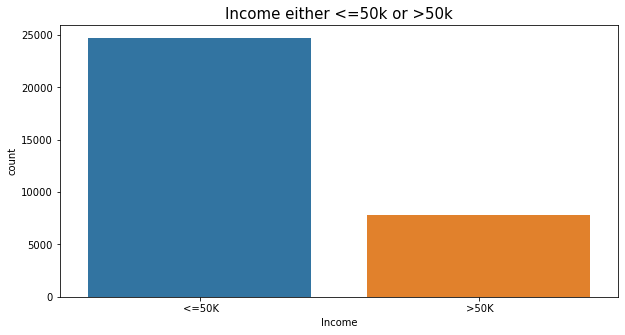

In [16]:
plt.figure(figsize = (10,5)) 
sns.countplot(x="Income", data=df) 
plt.title("Income either <=50k or >50k", fontsize = 15)
plt.show()

Clearly visbile there is more number of people having less income than 50K.

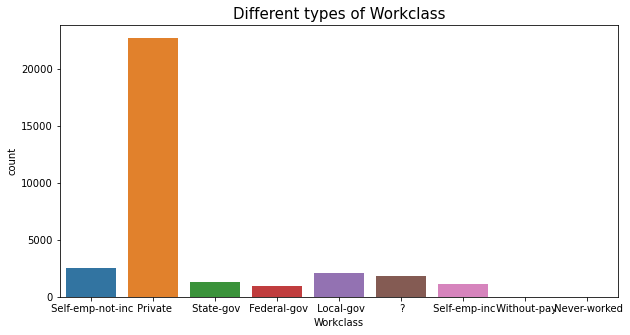

In [17]:
plt.figure(figsize = (10,5))
sns.countplot(x="Workclass", data=df)
plt.title("Different types of Workclass", fontsize = 15)
plt.show()

Private sector is clearly visible more in number than any other types of workclas.

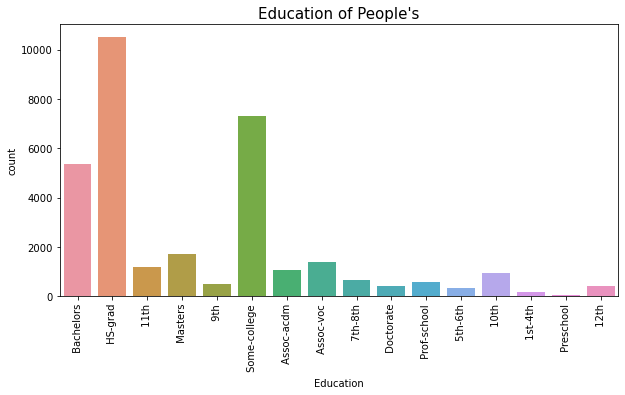

In [18]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="Education", data=df)
plt.title("Education of People's", fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

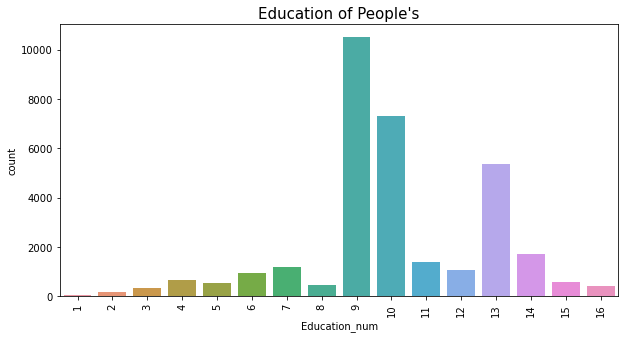

In [19]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="Education_num", data=df)
plt.title("Education of People's", fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [20]:
for i in ['Education','Education_num']:
    print(i,':')
    print(df[i].value_counts())

Education :
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Education_num :
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


Education & Education_num both are same columns having same details, naming conventions only changed. So better drop one value.

In [21]:
df.drop(columns='Education_num',axis=1,inplace=True)

In [22]:
df.shape

(32560, 14)

HS-Grad qualified peoples are maximum in numbers.

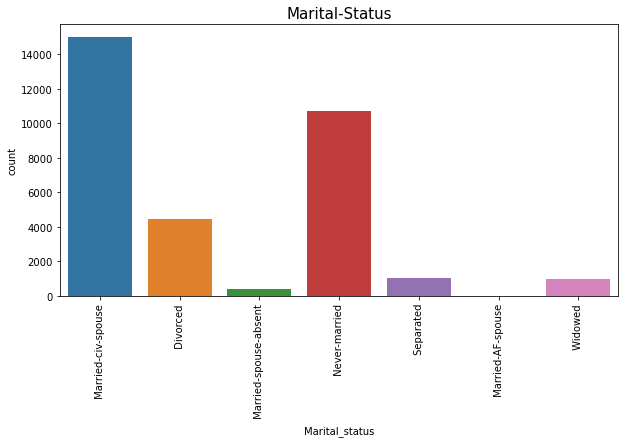

In [23]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="Marital_status", data=df)
plt.title("Marital-Status", fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Married-civ-spouse are maximum in numbers than other maritial status.

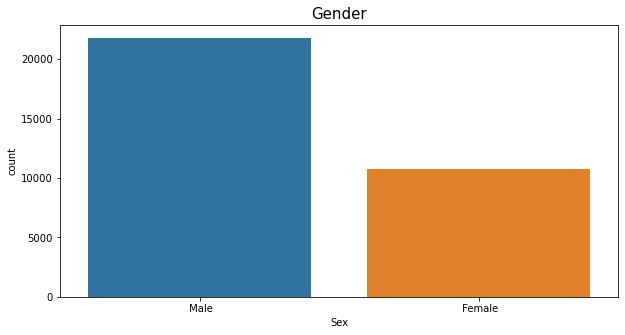

In [24]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="Sex", data=df)
plt.title("Gender", fontsize = 15)
plt.show()

clearly visible there is more number of male in the datsets.

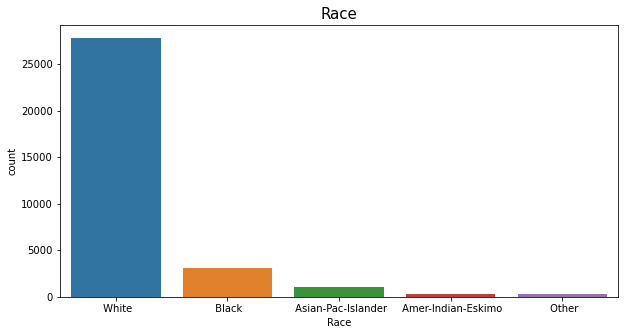

In [25]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="Race", data=df)
plt.title("Race", fontsize = 15)
plt.show()

People with white in color are more in datasets.

# Bivariate Analysis

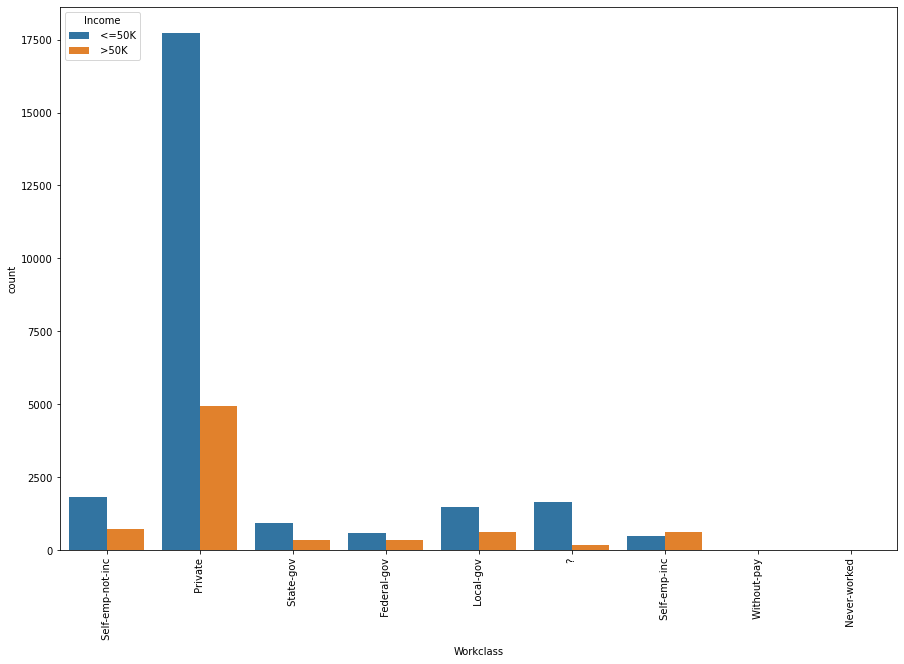

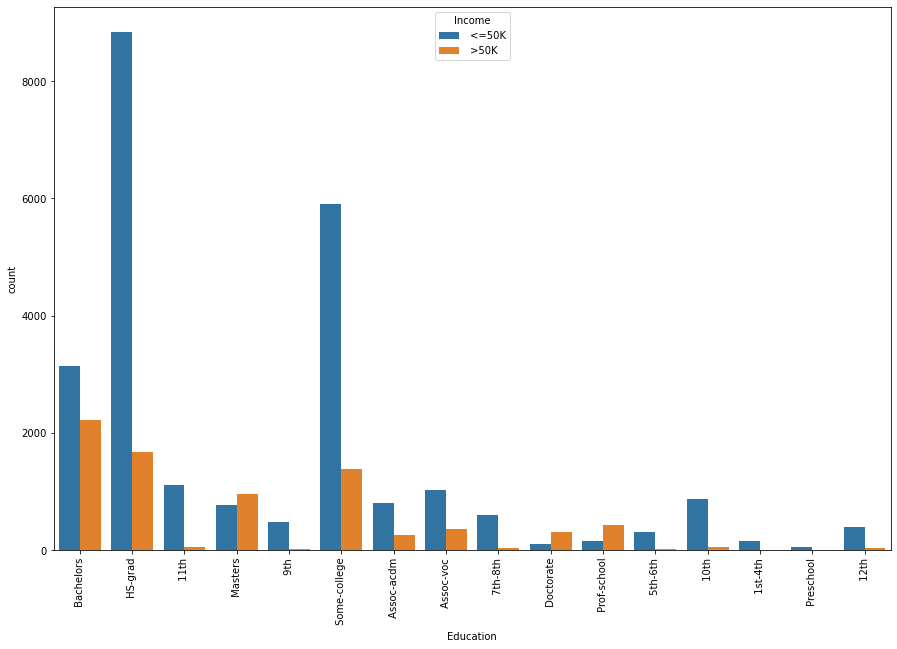

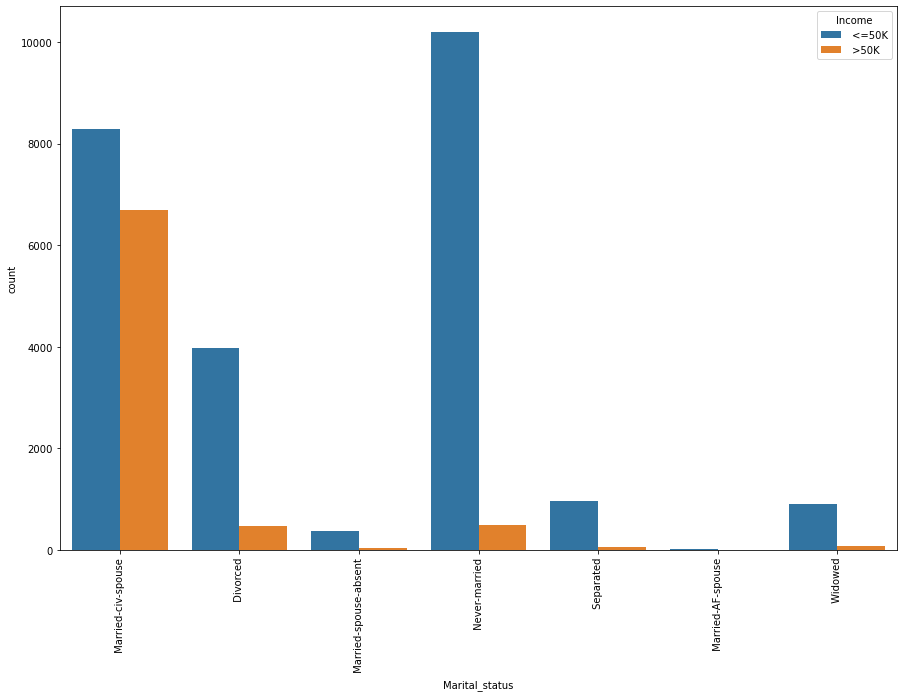

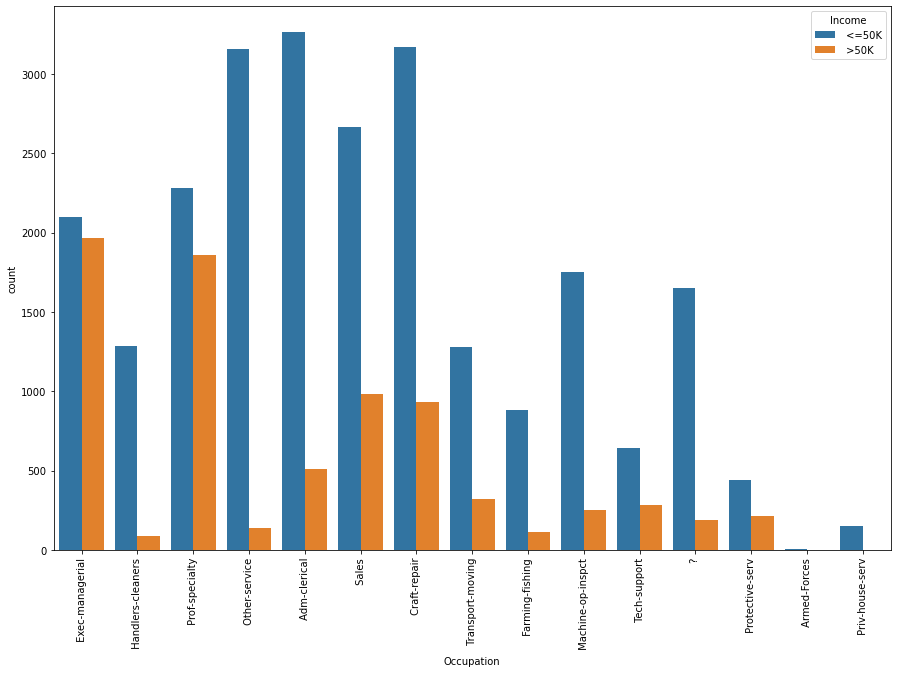

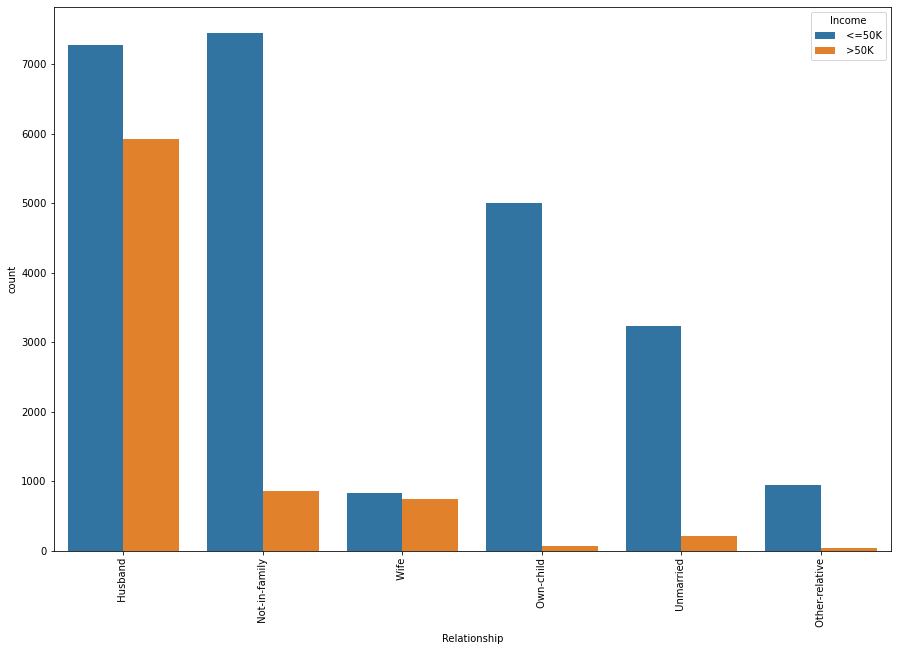

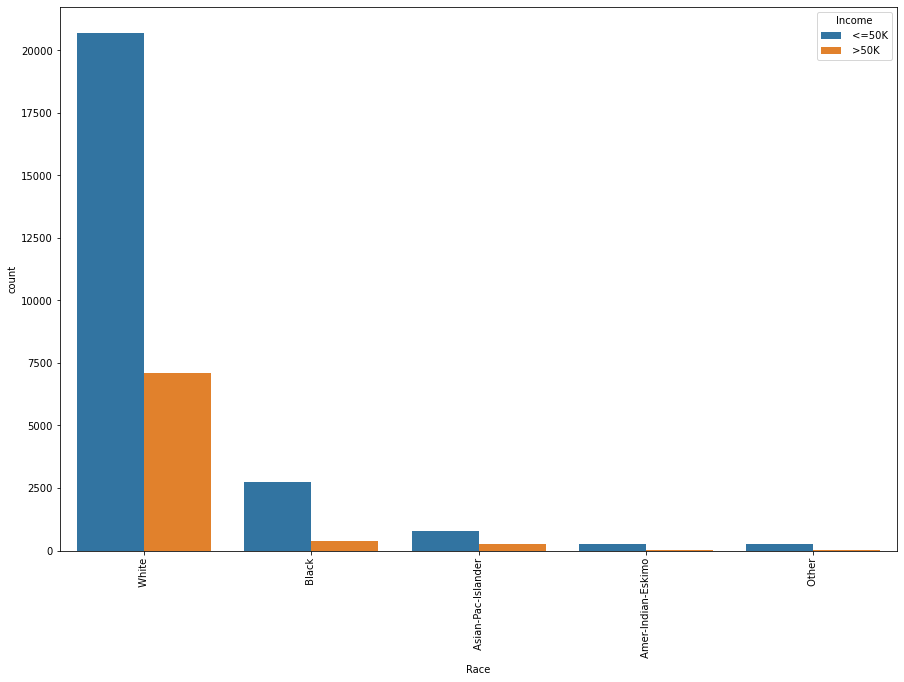

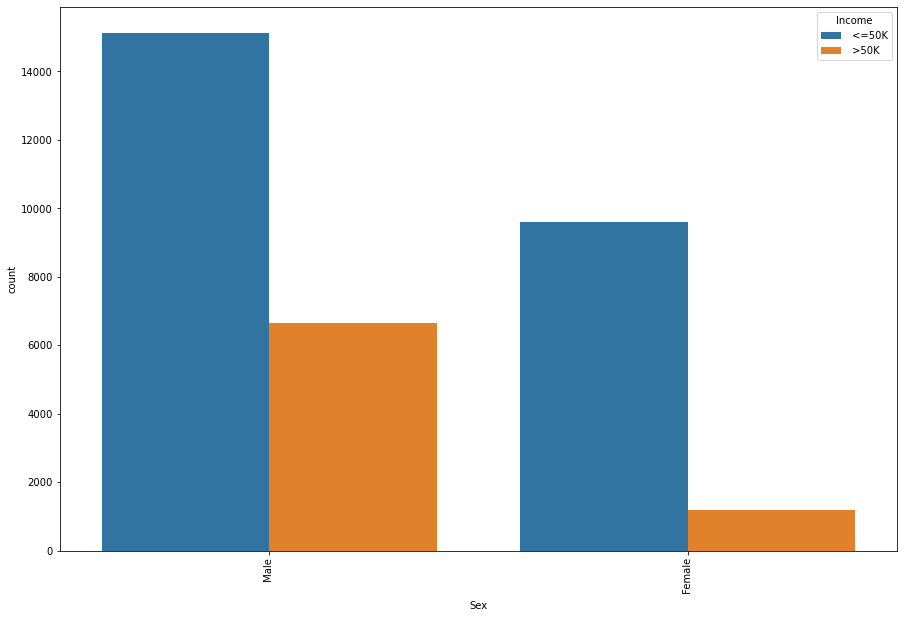

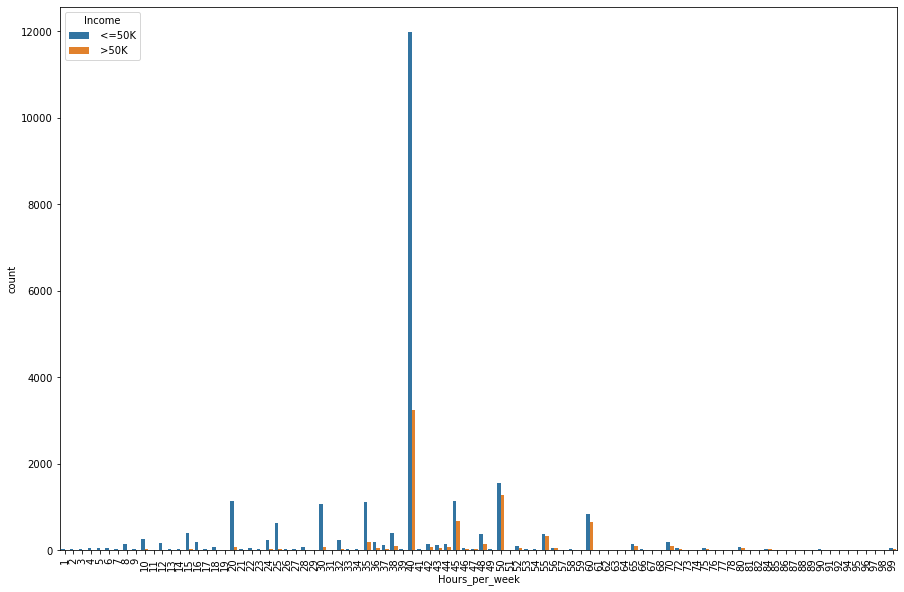

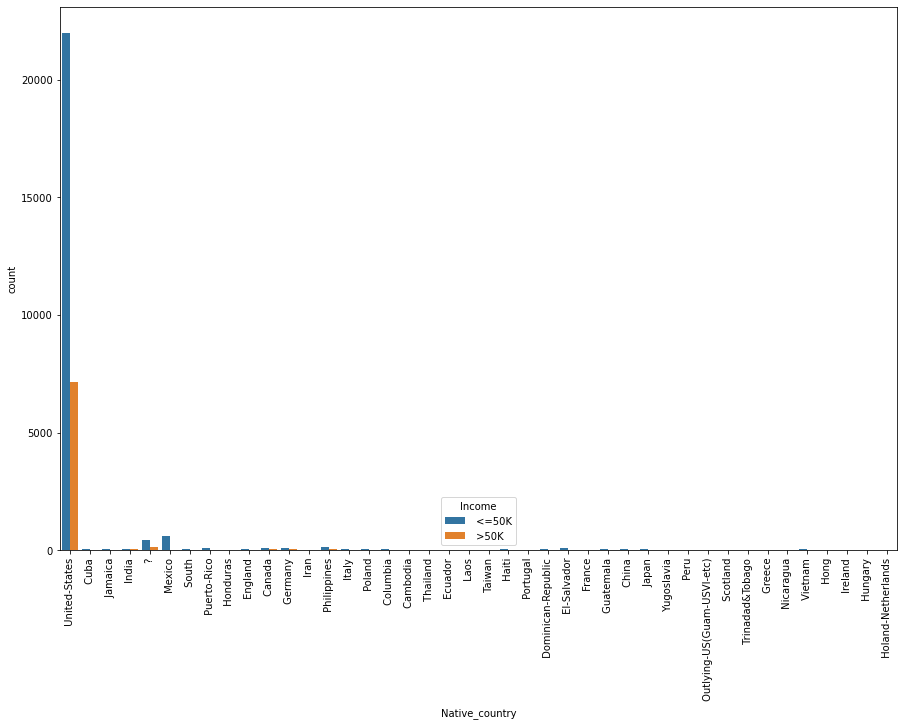

In [26]:
for i in ['Workclass','Education','Marital_status','Occupation', 'Relationship', 'Race', 'Sex','Hours_per_week','Native_country']:
    plt.figure(figsize=(15,10))
    sns.countplot(x=df[i],hue='Income',data=df)
    plt.xticks(rotation=90)
    plt.show()

from the above plotting we can se-

people of private company are having more in number earning more than 50k.

people of qualified with HS-grad are more in number earning more than 50k. 

People who never married are more in number earning more than 50k & married civ-spouse are more in number less than 50k.

husbands & not in family peoples are more in number earning more than 50k

white people are earing maximum

males are more in number in terms of earnings.

US states is having maximum income


# Correlation

In [27]:
print('Data description')
df.describe()

Data description


,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


capital gains & capital loss are having definetely very high standard devaition and outliers are presnt.

<AxesSubplot:>

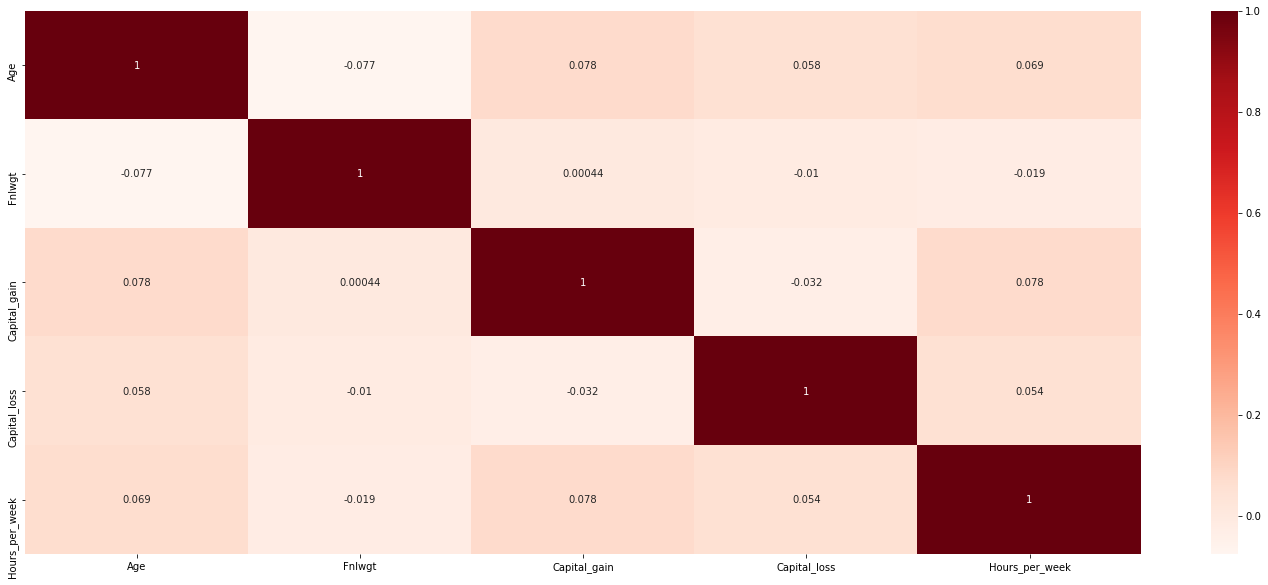

In [28]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,cmap='Reds')

But we can see clear picture of correlation with target variable so lets convert all the categorical features. Lets do
label encoding.

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])

In [30]:
df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,2,4,5,4,0,0,0,40,39,0


<AxesSubplot:>

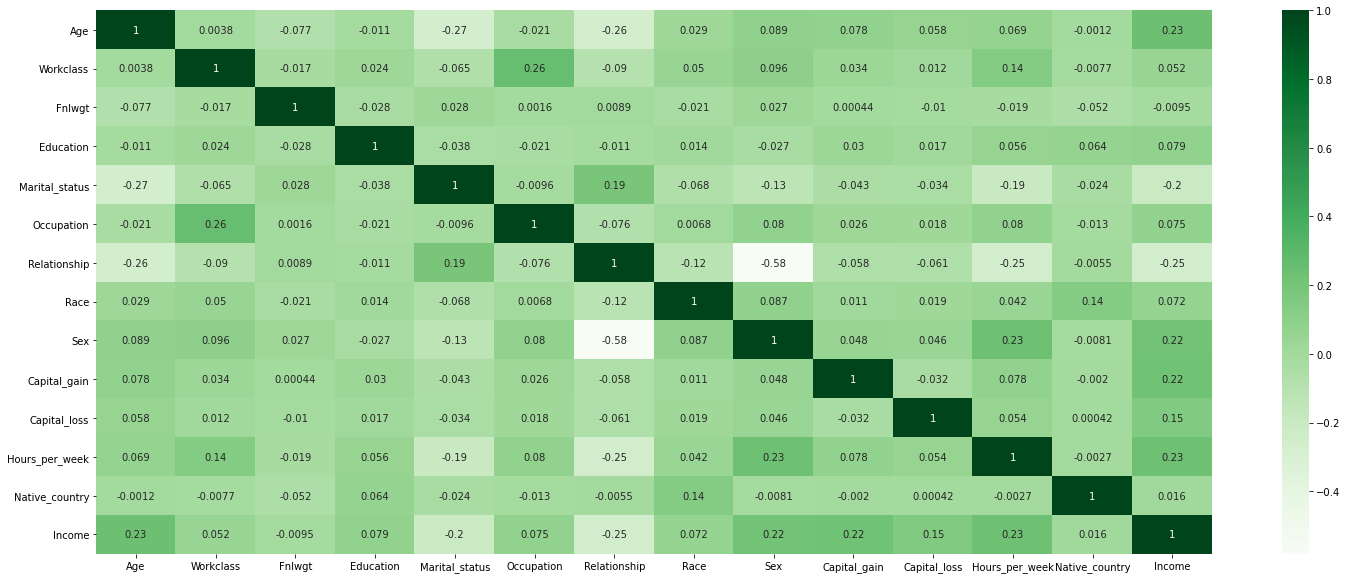

In [31]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

There is positive correlation with target most of the feature columns except- Native country,Relationship,maritial status,
eduactiion & fnlwght.

Relationship is having the least correlation with target variable.


In [32]:
#dropping relationship
df.drop(columns='Relationship',axis=1,inplace=True)

In [33]:
df.shape

(32560, 13)

# Data Cleaning

# Outlier checking

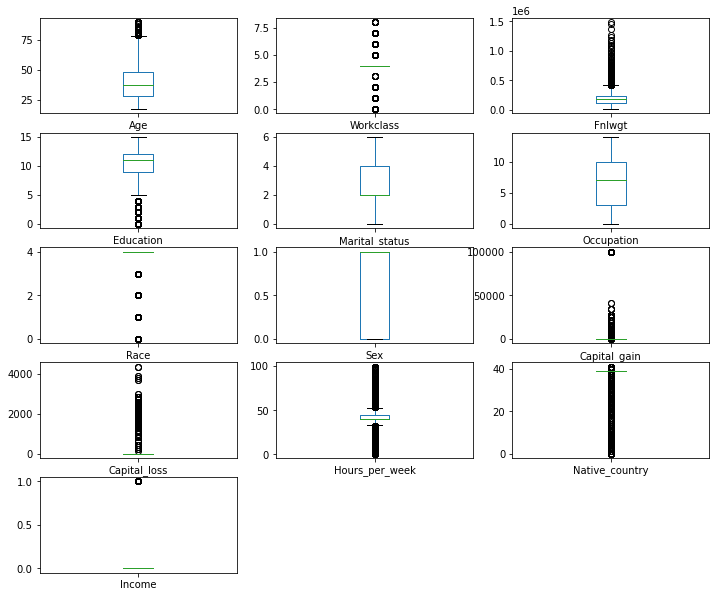

In [34]:
df.plot(kind='box',subplots=True,layout=(12,3),figsize=(12,25))
plt.show()

Mostly like there is very few outliers are presnt in the datset.

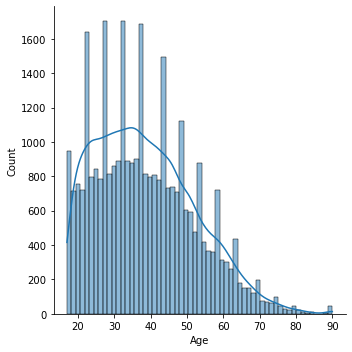

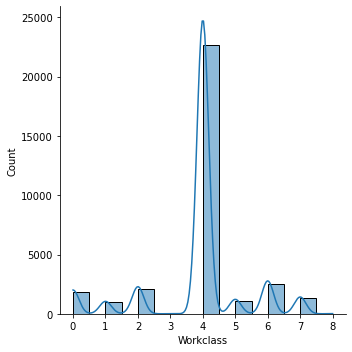

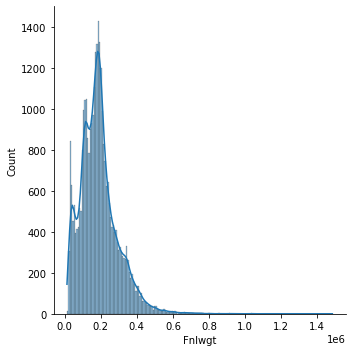

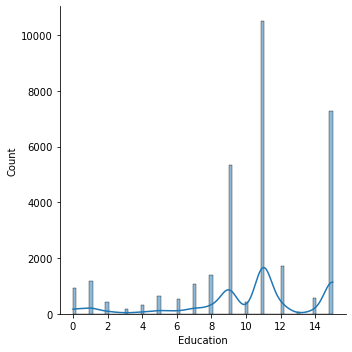

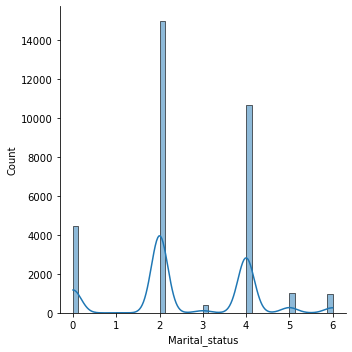

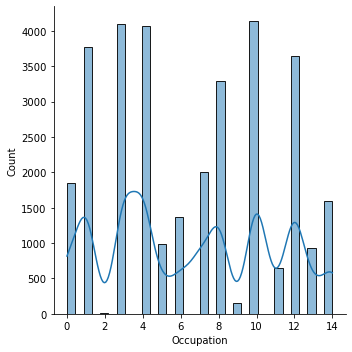

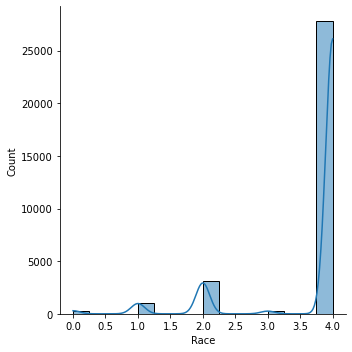

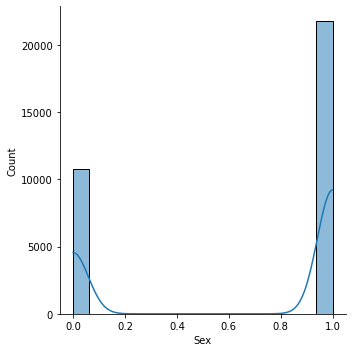

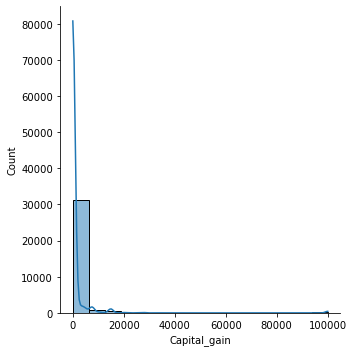

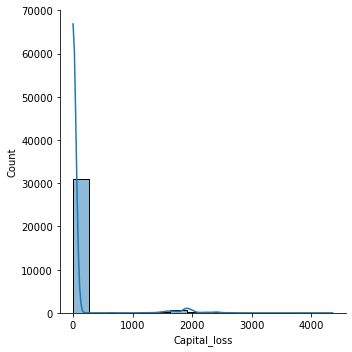

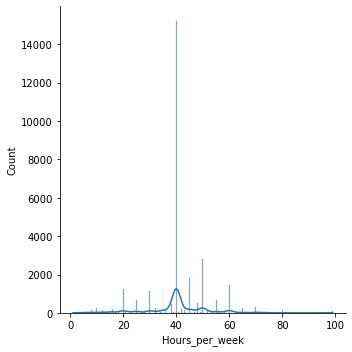

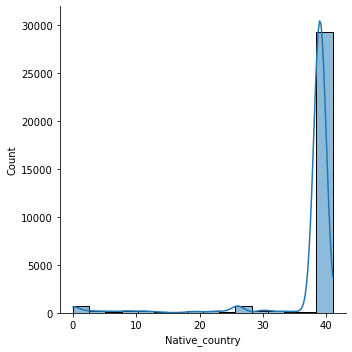

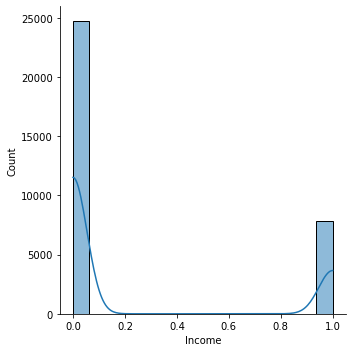

In [35]:
for i in df.columns:
    sns.displot(df[i],kde=True)
    plt.show()

there is skewness are presnt in few of the dataset columns

# Applying zscore

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(32560, 13)

In [37]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int32), array([11, 10,  6, ...,  6,  6,  6], dtype=int32))


In [38]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(32560, 13)
(27561, 13)


In [39]:
df=df_new
print(df.shape)

(27561, 13)


we are going to split the feature columns & target.

In [40]:
x = df.drop(['Income'],axis=1)
y = df['Income']

In [41]:
x.shape, y.shape

((27561, 12), (27561,))

# Standard Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=sc.fit_transform(x)
x=pd.DataFrame(k,columns = x.columns)

# MOdeling

In [43]:
#models froms sickit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score

##ensemble technique
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


#Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [44]:
#models used for modelling

LR=LogisticRegression()
RFC=RandomForestClassifier()
ADA=AdaBoostClassifier()
KNN=KNeighborsClassifier()
DTC=DecisionTreeClassifier()

In [45]:
model=[DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),KNeighborsClassifier(),LogisticRegression()]
maxacc=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    for z in model:
        
        lr=LogisticRegression()
        lr.fit(x_train,y_train)
        predrf=lr.predict(x_test)
        acc=accuracy_score(y_test,predrf)
        
        if acc>maxacc:
            maxacc=acc
            maxrs=i
            final_model=z
print('Best accuracy is',maxacc,'on random state', maxrs,'of model',final_model)

Best accuracy is 0.8143669125650018 on random state 84 of model DecisionTreeClassifier()


In [46]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=84)

So as we can see that best accuracy score is at random state of 84.



****************** DecisionTreeClassifier() *******************


accuracy score: DecisionTreeClassifier()
0.8126247052421549
[[3783  537]
 [ 496  697]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4320
           1       0.56      0.58      0.57      1193

    accuracy                           0.81      5513
   macro avg       0.72      0.73      0.73      5513
weighted avg       0.81      0.81      0.81      5513

Cross Validation Score: 0.8047240366285573


auc score: 0.7299679263295148


roc_auc_score =  0.7299679263295148


AxesSubplot(0.125,0.808774;0.62x0.0712264)





****************** RandomForestClassifier() *******************


accuracy score: RandomForestClassifier()
0.8606929076727734
[[4033  287]
 [ 481  712]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4320
           1       0.71      0.60      0.65      1193

    accuracy                          

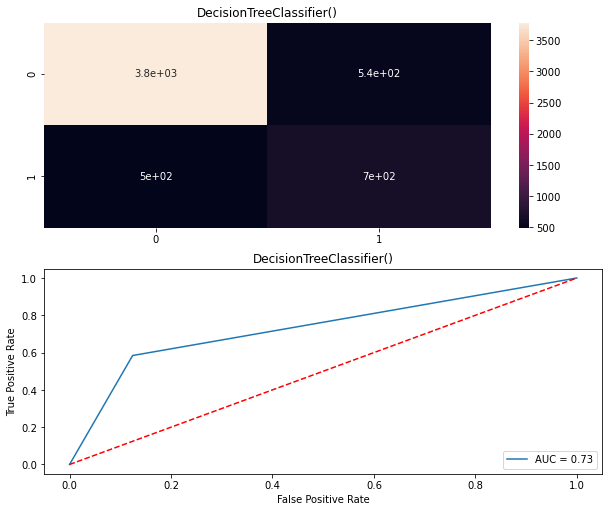

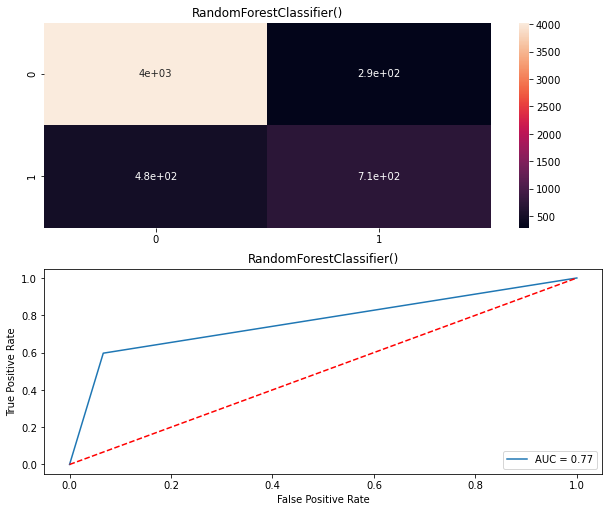

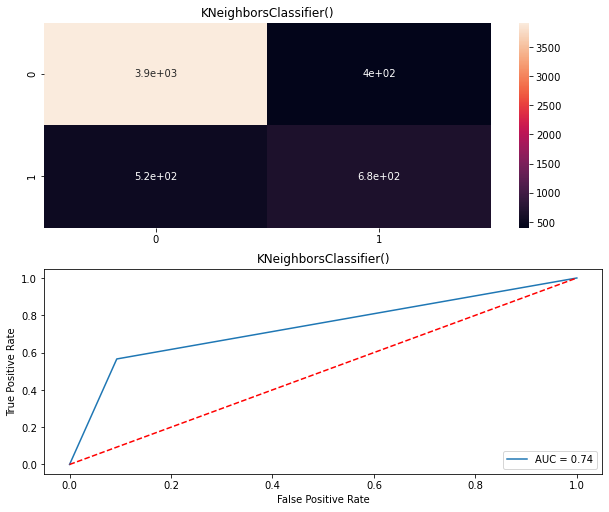

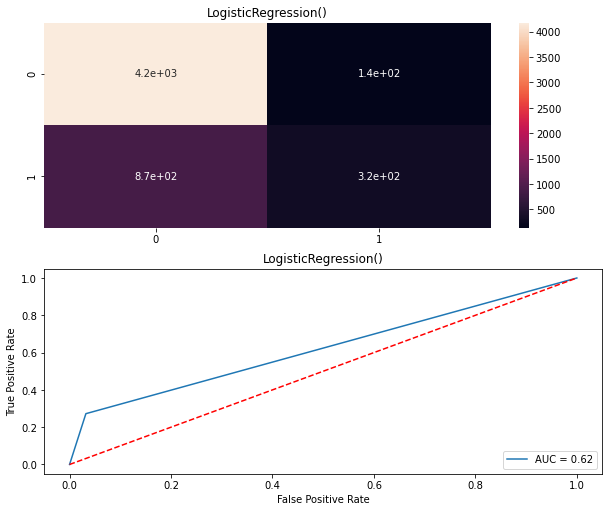

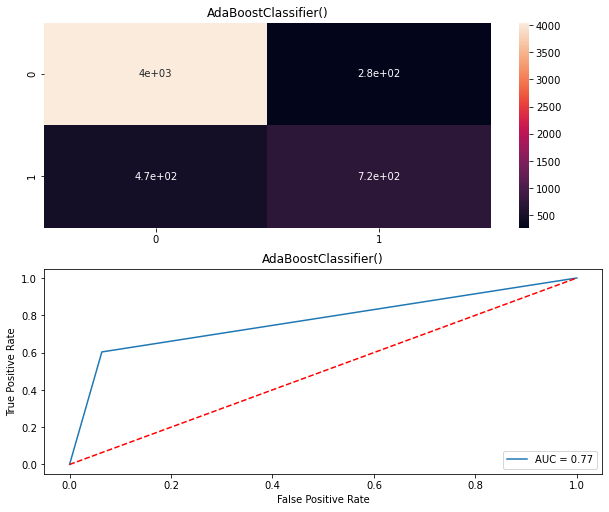

In [47]:
score=[]
cvs=[]
rocscore=[]
for i in model:
    print('\n')
    print('******************',i,'*******************')
    print('\n')
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    
    print('accuracy score:',i)
    score=accuracy_score(y_test,pred)
    print(score)
    
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print(classification_report(y_test,pred))
    
    cross=cross_val_score(i, x, y, cv=5, scoring='accuracy').mean()
    print('Cross Validation Score:',cross)
    cvs.append(cross)
    print('\n')
    
    print('auc score:',roc_auc_score(y_test,pred))
    print('\n')
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(i)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

Note from above observations-

# AdaBoost Classifier is performing best with accuracy of 86%, cross val score of 86% and auc score of 76%

# Hyper Paramter Tuning

In [48]:
#parameter list of AdaBoost Classifier

from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[100,200,300],'learning_rate':[0.001,0.01,0.1,1]}
GCV=GridSearchCV(ADA,parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 200, 300]})

In [49]:
GCV.best_params_

{'learning_rate': 1, 'n_estimators': 300}

In [50]:
predgcv=GCV.best_estimator_.predict(x_test)

In [51]:
print('Accuracy score:')
print(accuracy_score(y_test,predgcv))
print(confusion_matrix(y_test,predgcv))
print(classification_report(y_test,predgcv))
cvs_score=cross_val_score(GCV.best_estimator_, x, y, cv=5,scoring='accuracy')
print('Cross Validation Score:',score.mean())
print('auc score:',roc_auc_score(y_test,predgcv))

Accuracy score:
0.8681298748412842
[[4047  273]
 [ 454  739]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4320
           1       0.73      0.62      0.67      1193

    accuracy                           0.87      5513
   macro avg       0.81      0.78      0.79      5513
weighted avg       0.86      0.87      0.86      5513

Cross Validation Score: 0.8643206965354616
auc score: 0.7781261641985657


Slightly accuracy score , cvs & auc score increased by 1%

Text(0.5, 0, 'False Positive Rate')

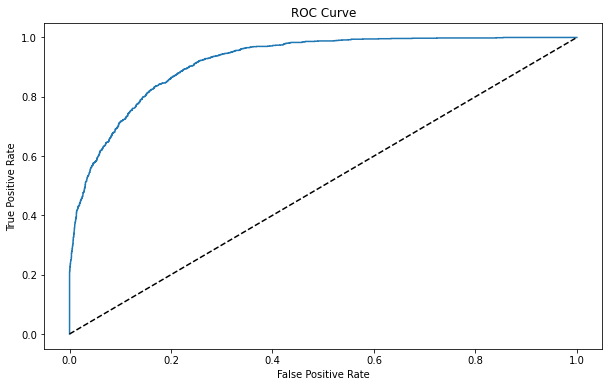

In [52]:
y_pred_prob=GCV.best_estimator_.predict_proba(x_test)[:,1]
    
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_prob)

plt.figure(figsize=(10,6))
plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, label='ADA Boost classifier')
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Model Saving

In [53]:
#import joblib
#joblib.dump(ada_mod,"Finalmodel.pkl")

# Completed--->>